 ╔══<i><b>Alai-DeepLearning</b></i>════════════════════════════╗
###  &nbsp;&nbsp; **✎&nbsp;&nbsp;Week 9. CNN Basis**
# Section 1. 합성곱 연산이란

### _Objective_
1. 대부분의 합성곱 연산은 4차원의 데이터를 다룹니다. 이를 어떻게 연산하는 지를 배워봅니다. <br>
2. 합성곱 연산의 연산량을 줄여주는 풀링 연산에 대해 배워봅니다.<br> 
  
╚═════════════════════════════════════════╝

In [0]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import cv2

<br><br>

# \[ 2. 합성곱 연산으로 특징 추출하기 \]

----

----

> *합성곱 연산은 딥러닝이 도입되기 이전부터, 컴퓨터비전 분야에서 영상 속 특징을 파악하기 위해,이용된 방법입니다.*<br>
> *몇 가지 예시를 통해, 어떤 식으로 특징을 추출하는지 파악해보도록 하겠습니다.*<br>

<br>
## 1. 합성곱 연산의 동작
----

* 합성곱을 연산하기 위해서는 입력 특징 맵과 필터가 필요합니다.<br>

### (1) 입력 특징 맵과 필터를 구성하기

In [0]:
features = np.arange(0,16).reshape(4,4)
features

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15]])

In [0]:
filter = np.array([
    [1,0,2],
    [2,1,3],
    [3,1,2]
])

### (2)  합성곱 연산 수행하기

합성곱 연산은 특징 맵에서 필터의 크기만큼 패치를 추출합니다.<br>
해당 패치와 필터끼리 대응하는 원소끼리 곱한 후, 그 총합을 구합니다. 

In [0]:
# convolution 한후 결과가 담길 matrix의 hegith, width 
result_h = #fix me# 
result_w = #fix me# 
# filter 의 hegith, width
filter_h = #fix me# 
filter_w = #fix me# 
# convolution 한후 결과가 담길 matrix 입니다. 
result = #fix me# 
for i in range(result_h):
    for j in range(result_w):
        # (1) 특징 맵에서 필터크기 만큼 패치를 하나씩 가져옴
        patch = features[i:i+filter_h, j:j+filter_w] 
        # (2) 원소 별로 곱한 후 그 총합을 계산
        value = np.sum(patch * filter)
        # (3) 결과를 result에 저장
        result[i,j] = value
result

array([[ 88., 103.],
       [148., 163.]])

### (3) 합성곱 연산의 장점

1. 변수 공유 (Parameter Sharing): <br>
> 이미지의 한 부분에 유의미했던 필터가 다른 부분에서도 동일하게 유의미할 수 있습니다.<br>
> 이 덕분에 Parameter의 수가 획기적으로 줄어들 수 있었음

2. 희소 연결 (Sparsity of connections)
> 출력값이 이미지의 일부(작은 입력값)에 영향을 받고, 나머지 픽셀들의 영향을 거의 받지 않습니다.
> 이미지의 일부만 뽑아 처리하기 때문에, 과대적합 문제를 해결할 수 있습니다.

<br>
## 2. 예제 ) 선분 추출하기
----

간단한 필터를 통해, 어떤 식으로 영상에서 특징을 추출하는지를 파악할 수 있습니다.<br>

### (1) 이미지 구성하기

아래와 같이 체크무늬로 구성된 이미지를 만들어 보겠습니다.

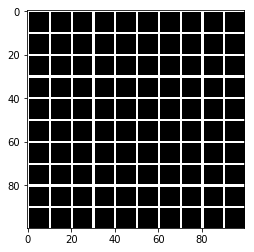

In [0]:
image = np.zeros((100,100),dtype=np.uint8)
# 10 pixel 씩 건너 뛰면서 행에 픽셀값 10을 부여 합니다. 
image[#fix me#] = 10
# 10 pixel 씩 건너 뛰면서 열에 픽셀값 10을 부여 합니다. # 
image[#fix me#] = 10

plt.imshow(image,cmap='gray')
plt.show()

### (2) 필터 구성하기

아래의 필터는 수평방향에 대한 값의 변화를 잡는 필터입니다.<br>
아래 필터는 sobel filter로 영상 처리에서 수직선을 잡는데 쓰입니다.

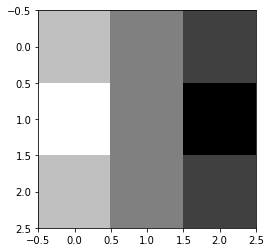

In [0]:
v_filter = np.array([
    [1,0,-1],
    [2,0,-2],
    [1,0,-1],
])
plt.imshow(v_filter,cmap='gray')
plt.show()

### (3) 합성곱 연산 수행하기

위의 필터는 수직 방향의 값이 바뀌는 부분에서만 Edge 부분에서만 값을 가집니다.

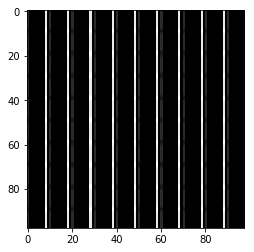

In [0]:
result_h = # fix me #
result_w = # fix me #
filter_h = # fix me #
filter_w = # fix me #
result = # fix me #

for i in range(result_h):
    for j in range(result_w):
        # (1) 특징 맵에서 필터크기 만큼 패치를 하나씩 가져옴
        patch = image[# fix me #] 
        # (2) 원소 별로 곱한 후 그 총합을 계산
        value = # fix me #
        # (3) 결과를 result에 저장
        result[i,j] = # fix me #
result
plt.imshow(result, cmap='gray')

### (4) 수평선 추출하기
반대로, 수평 방향으로 구성할 경우 우리는 수평방향 선분만을 추출할 수 있게 됩니다.

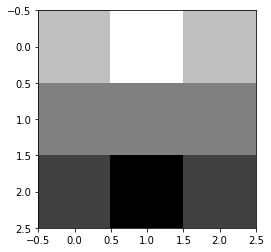

In [0]:
h_filter = np.array([
    [1,2,1],
    [0,0,0],
    [-1,-2,-1],
])
plt.imshow(h_filter,cmap='gray')
plt.show()

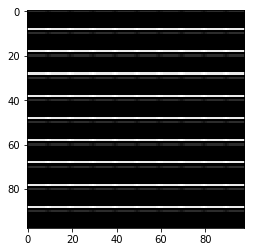

In [0]:
result_h = #fix me#
result_w = #fix me#
filter_h = #fix me#
filter_w = #fix me#
result = #fix me#

for i in range(result_h):
    for j in range(result_w):
        # (1) 특징 맵에서 필터크기 만큼 패치를 하나씩 가져옴
        patch = #fix me#
        # (2) 원소 별로 곱한 후 그 총합을 계산
        value = #fix me#
        # (3) 결과를 result에 저장
        result[i,j] = #fix me#
result
plt.imshow(result, cmap='gray')

<br>
## 3. 예제 ) 윤곽선 추출하기
----

위에서 이용한 수평 방향 필터와 수직 방향 필터의 조합으로<br>
윤곽선을 추출해보도록 하겠습니다.

### (1) 데이터 가져오기

손 이미지를 하나 가져와서, 손의 윤곽선을 추출해보도록 하겠습니다.<br>

--2019-05-31 15:24:53--  https://s3.ap-northeast-2.amazonaws.com/pai-datasets/alai-deeplearning/hands.jpg
Resolving s3.ap-northeast-2.amazonaws.com (s3.ap-northeast-2.amazonaws.com)... 52.219.56.77
Connecting to s3.ap-northeast-2.amazonaws.com (s3.ap-northeast-2.amazonaws.com)|52.219.56.77|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20741 (20K) [image/jpeg]
Saving to: ‘hands.jpg.3’

hands.jpg.3         100%[===================>]  20.25K  --.-KB/s    in 0.1s    

2019-05-31 15:24:54 (171 KB/s) - ‘hands.jpg.3’ saved [20741/20741]



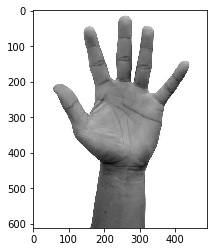

In [0]:
!wget https://s3.ap-northeast-2.amazonaws.com/pai-datasets/alai-deeplearning/hands.jpg
    
    
# open CV 을 이용해 image 을 load 합니다.
hand_image = cv2.imread('hands.jpg',cv2.IMREAD_GRAYSCALE)
plt.imshow(hand_image,cmap='gray')
plt.show()

### (2) 수직 방향, 수평 방향 성분 추출하기

아까와 동일하게 필터를 구성해 가져오도록 하겠습니다.

In [0]:
w_sobel = np.array([
    [1,2,1],
    [0,0,0],
    [-1,-2,-1],
])

h_sobel = np.array([
    [1,0,-1],
    [2,0,-2],
    [1,0,-1],
])


# hand_image 에 w_sobel filter 을 적용합니다. 
result_h = #fix me#
result_w = #fix me#
filter_h = #fix me#
filter_w = #fix me#

# w_sobel filter 을 convolution 한 결과를 저장합니다.
w_image = #fix me#
# h_sobel filter 을 convolution 한 결과를 저장합니다.
h_image = #fix me#
for i in range(#fix me#):
    for j in range(#fix me#):
        # (1) 특징 맵에서 필터크기 만큼 패치를 하나씩 가져옴
        patch = #fix me#
        # (2) 원소 별로 곱한 후 그 총합을 계산
        w_value = #fix me#
        h_value = #fix me#
        # (3) 결과를 result에 저장
        w_image[i,j] = #fix me#
        h_image[i,j] = #fix me#

NameError: ignored

### (3) 수직 방향, 수평 방향 성분 시각화하기

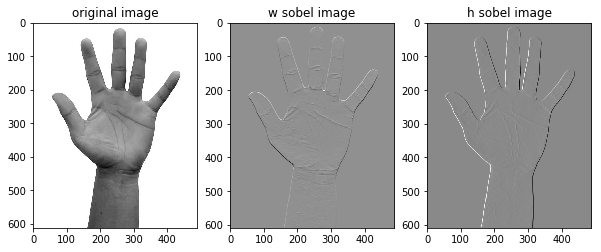

In [0]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1,3,1)
ax.set_title('original image')
ax.imshow(hand_image,cmap='gray')
ax = fig.add_subplot(1,3,2)
ax.set_title('w sobel image')
ax.imshow(w_image, cmap='gray')
ax = fig.add_subplot(1,3,3)
ax.set_title('h sobel image')
ax.imshow(h_image, cmap='gray')
plt.show()

### (4) 윤곽선 추출하기

윤곽선은 수평 방향의 성분과 수직 방향의 성분의 제곱 합으로 구성됩니다.<br>

$$
I_{i,j} = \sqrt{W_{i,j}^2+H_{i,j}^2}
$$

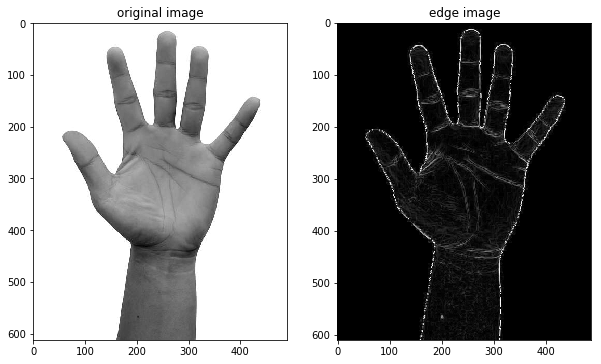

In [0]:
edge_image = #fix me#
edge_image = edge_image.astype(np.uint8)

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1,2,1)
ax.set_title('original image')
ax.imshow(hand_image,cmap='gray')
ax = fig.add_subplot(1,2,2)
ax.set_title('edge image')
ax.imshow(edge_image,cmap='gray')
plt.show()

<br><br>

# \[ 3. Tensorflow 을 이용해 convolution 연산하기 \]

----

----

>  Tensorlfow  library 을 이용해 어떻게 합성곱을 수행하는 지 파악해 봅니다. <br>

> 이미지에 convolution 을 적용시킬 때  `tf.nn.conv2d()` 을 사용합니다.  


--2019-06-04 12:36:32--  https://s3.ap-northeast-2.amazonaws.com/pai-datasets/alai-deeplearning/hands.jpg
Resolving s3.ap-northeast-2.amazonaws.com (s3.ap-northeast-2.amazonaws.com)... 52.219.58.12
Connecting to s3.ap-northeast-2.amazonaws.com (s3.ap-northeast-2.amazonaws.com)|52.219.58.12|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20741 (20K) [image/jpeg]
Saving to: ‘hands.jpg.39’

hands.jpg.39        100%[===================>]  20.25K  --.-KB/s    in 0.1s    

2019-06-04 12:36:33 (171 KB/s) - ‘hands.jpg.39’ saved [20741/20741]



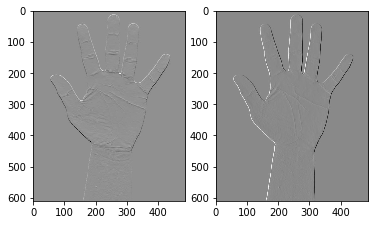

In [0]:
import tensorflow as tf 
import numpy as np 
import matplotlib.pyplot as plt
import cv2

# 이미지를 다운 로드 받습니다. 
!wget https://s3.ap-northeast-2.amazonaws.com/pai-datasets/alai-deeplearning/hands.jpg

# opencv 로 image 을 load 합니다. 
hand_image = cv2.imread('hands.jpg',cv2.IMREAD_GRAYSCALE)

# image 에 normalization 을 수행합니다. 
#fix me# 

# filter
w_sobel = np.array([
    [1,2,1],
    [0,0,0],
    [-1,-2,-1],
], dtype=np.float32)

h_sobel = np.array([
    [1,0,-1],
    [2,0,-2],
    [1,0,-1],
], dtype=np.float32)


# tf.nn.conv2d 함수에 사용할수 있도 image 의 shape 변형하기 (612, 490) -> (1, 612, 490, 1) 
res_hand_image = #fix me# 

# tf.nn.conv2d 함수에 사용할수 있도 image 의 shape 변형하기 (3,3) -> (3,3,1,2) 
res_filter = #fix me #

# image to tensor 
tf_hand = #fix me #

# filter to tensor 
tf_filter = #fix me # 

# convolution 
result = #fix me # using tf.nn.conv2d

sess = tf.Session()
result_ = sess.run(result)

fig, axes = plt.subplots(1,2)
axes[0].imshow(#fix me #)
axes[1].imshow(#fix me #)
plt.show()

#  

---

    Copyright(c) 2019 by Public AI. All rights reserved.<br>
    Writen by PAI, SangJae Kang ( rocketgrowthsj@publicai.co.kr )  last updated on 2019/04/25

---